In [1]:
import daspi as dsp
DPI = 120
dsp.__version__

'0.5.0'

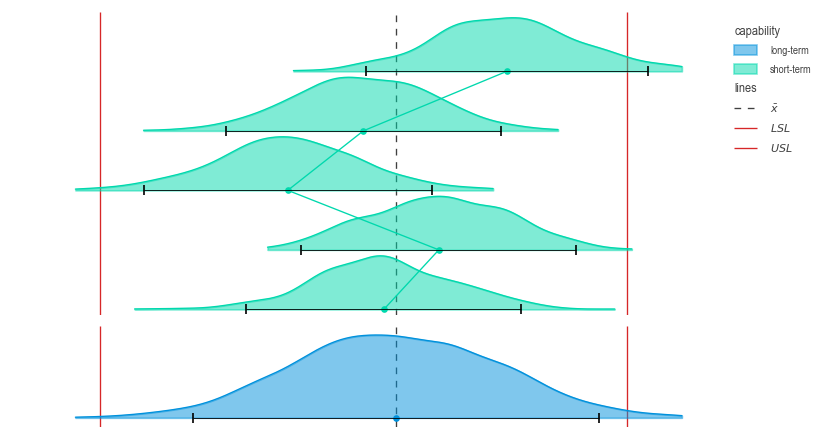

In [19]:
import numpy as np
import pandas as pd
from scipy import stats
from typing import Any
from typing import Dict

import seaborn as sns
sns.displot

np.random.seed(3)
N_SAMPLES = 500
HEIGHT = 0.9
means = np.random.random(5)-0.5
df_batch = pd.DataFrame()

for i, mean in enumerate(means):
    pos = i
    data = pd.DataFrame({
        'capability': 'short-term',
        'position': pos,
        'values': stats.norm.rvs(size=N_SAMPLES, loc=mean, scale=0.2)})
    df_batch = pd.concat([df_batch, data], axis=0, ignore_index=True)
df_tot = pd.DataFrame({
    'capability': 'long-term',
    'position': 0,
    'mean': '0',
    'values': df_batch['values']})

chart = dsp.JointChart(
        source=pd.concat([df_batch, df_tot]),
        target='values',
        feature='position',
        hue='capability',
        ncols=1,
        nrows=2,
        height_ratios=[3, 1],
        target_on_y=False,
        sharex=True,
        sharey=False,
    ).stripes(
        stripes=[dsp.StripeLine(
            r'\bar x', df_tot['values'].mean(), orientation='vertical')],
        spec_limits=(-0.75, 0.75),
    ).label(
    )

def axes_settings(ax) -> None:
    ax.xaxis.set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set(ylim=(-0.1, None), xlim=(-1, 1))

kw_base: Dict[str, Any] = dict(
    feature='position',
    target='values',
    target_on_y=False,
    ax=chart.axes[0][0],
    color=dsp.COLOR.PALETTE[1])
kw_kde: Dict[str, Any] = dict(
    height=HEIGHT,
    fill=True,
    ignore_feature=False)
kw_spread: Dict[str, Any] = dict(
    marker='o',
    agreement=4,
)
dsp.CenterLocation(source=df_batch, center_points=False, **kw_base)()
for pos, group in df_batch.groupby('position'):
    dsp.GaussianKDE(source=group, f_base=pos, **(kw_base | kw_kde))()
    dsp.SpreadWidth(source=group, **(kw_base | kw_spread))()

kw_base['ax'] = chart.axes[1][0]
kw_base['color'] = color=dsp.COLOR.PALETTE[0]
dsp.GaussianKDE(source=df_tot, f_base=0, **(kw_base | kw_kde))()
dsp.SpreadWidth(source=df_tot, **(kw_base | kw_spread))()

for ax in chart.axes.flat:
    axes_settings(ax)

In [17]:
pos, data = next(iter(df_batch.groupby('position')))
estimation = dsp.ProcessEstimator(data['values'], -0.75, 0.75)
estimation.describe()

c:\Appl\Python\.virtualenvs\DataScience-DY0ovQ8g-3.11\Lib\site-packages\scipy\stats\_continuous_distns.py:6617: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


n_samples         500
n_missing           0
n_ok              500
n_nok               0
n_errors            0
mean         0.057594
median       0.050373
std          0.195618
sem          0.008748
excess       0.264404
p_excess     0.230381
skew         -0.02489
p_skew       0.818265
dist         logistic
p_ad         0.094351
lcl         -0.529261
ucl          0.644449
strategy         norm
lsl             -0.75
usl              0.75
cp           1.277999
cpk          1.179859
Z            3.539576
Z_lt         2.039576
dtype: object

In [13]:
estimation = dsp.ProcessEstimator(df_tot['values'], -0.75, 0.75)
estimation.describe()

c:\Appl\Python\.virtualenvs\DataScience-DY0ovQ8g-3.11\Lib\site-packages\scipy\stats\_continuous_distns.py:6617: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


n_samples           5000
n_missing              0
n_ok                4991
n_nok                  9
n_errors               0
mean           -0.038089
median         -0.055992
std             0.325579
sem             0.004604
excess         -0.809936
p_excess             0.0
skew            0.107933
p_skew          0.001868
dist         weibull_min
p_ad                 0.0
lcl            -1.014825
ucl             0.938647
strategy            norm
lsl                -0.75
usl                 0.75
cp              0.767864
cpk             0.728868
Z               2.186603
Z_lt            0.686603
dtype: object